1. EDA & Data Preprocessing
2. Feature Engineering & Feature Selection
3. Model Building
4. Model Evaluation
5. Hyperparameter Tuning
6. Final Model Evaluation

1. EDA & Data PreProcessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from joblib import dump


In [2]:
df = pd.read_csv('predictive_maintenance.csv', header=0)
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [3]:
df.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       558
metric3        47
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        65
dtype: int64

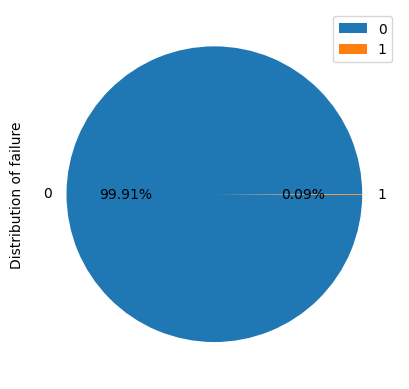

failure
0    124388
1       106
Name: count, dtype: int64

In [4]:
# visualising the target variable 
df['failure'].value_counts().plot.pie(autopct='%1.2f%%')
plt.ylabel('Distribution of failure')
plt.legend()
plt.show()
df['failure'].value_counts()

In [5]:
df.dtypes

date       object
device     object
failure     int64
metric1     int64
metric2     int64
metric3     int64
metric4     int64
metric5     int64
metric6     int64
metric7     int64
metric8     int64
metric9     int64
dtype: object

In [6]:
# number of null values 
null_count = df.isnull().sum()
print(null_count)

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64


In [7]:
# finding the number of unique devices by parsing the device id 
for i in range (1,8):
    print(f'Length {i} : {len(df["device"].str[0:i].unique())}')

Length 1 : 3
Length 2 : 3
Length 3 : 3
Length 4 : 7
Length 5 : 121
Length 6 : 608
Length 7 : 1104


therefore 3 types & 7 subtypes of devices

In [8]:
df['type'] = df['device'].str[0:1]
df['sub_type'] = df['device'].str[0:4]

In [9]:
print(df['type'].unique())
print(df['sub_type'].unique())

['S' 'W' 'Z']
['S1F0' 'S1F1' 'W1F0' 'W1F1' 'Z1F0' 'Z1F1' 'Z1F2']


In [10]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['sub_type'] = le.fit_transform(df['sub_type'])

In [11]:
# lets study the relation between dates and different devices 
# first make group of devices with the same device id and different dates
# convert date to standard datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek

In [12]:
failed_df = df[df['failure']==1]
failed_df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,type,sub_type,month,weekday
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1,0,0,1,0
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3,0,0,1,2
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0,1,2,1,4
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1,1,3,1,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0,1,3,1,2


In [13]:
columns = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']

def time_series_plot(device_df: pd.DataFrame):

    normalized_df = device_df.copy()  # Avoid modifying the original DataFrame
    for col in columns:
        normalized_df[col] = (normalized_df[col] - normalized_df[col].min()) / (normalized_df[col].max() - normalized_df[col].min())

    # Plot the normalized data
    plt.figure(figsize=(12,6))
    for col in columns:
        plt.plot(device_df['date'], normalized_df[col], label=col)
   

    plt.xlabel('Time')
    plt.ylabel('Metric Value')
    plt.title('Time Series Plot for All Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()

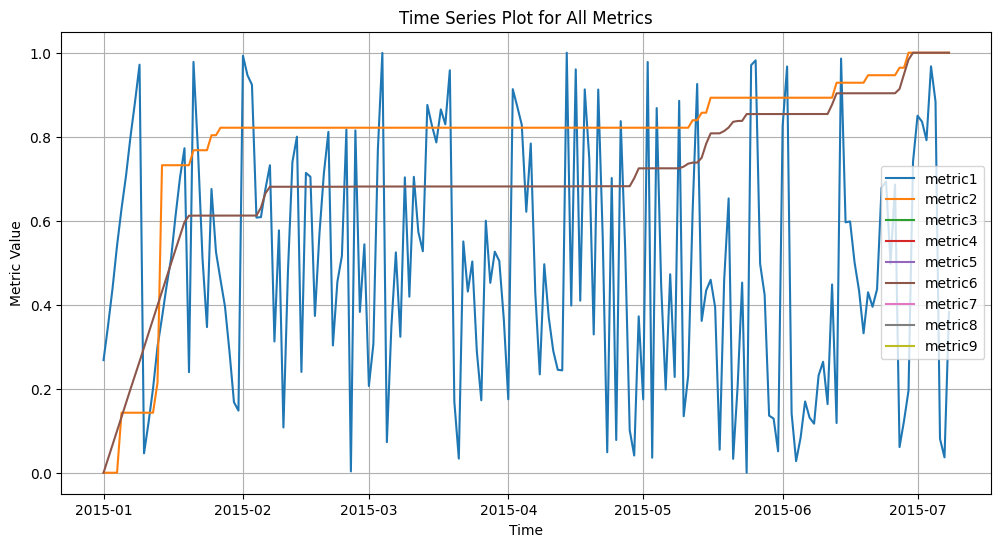

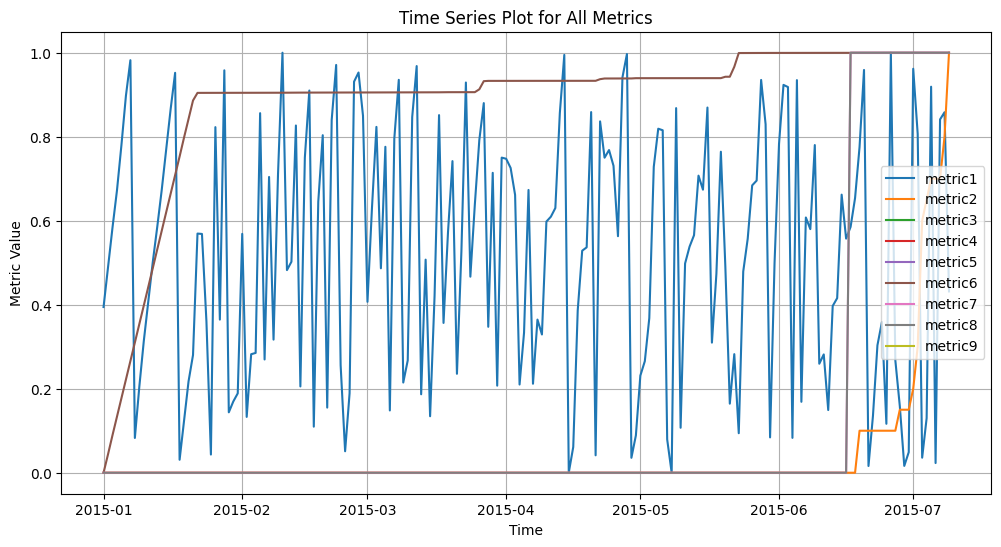

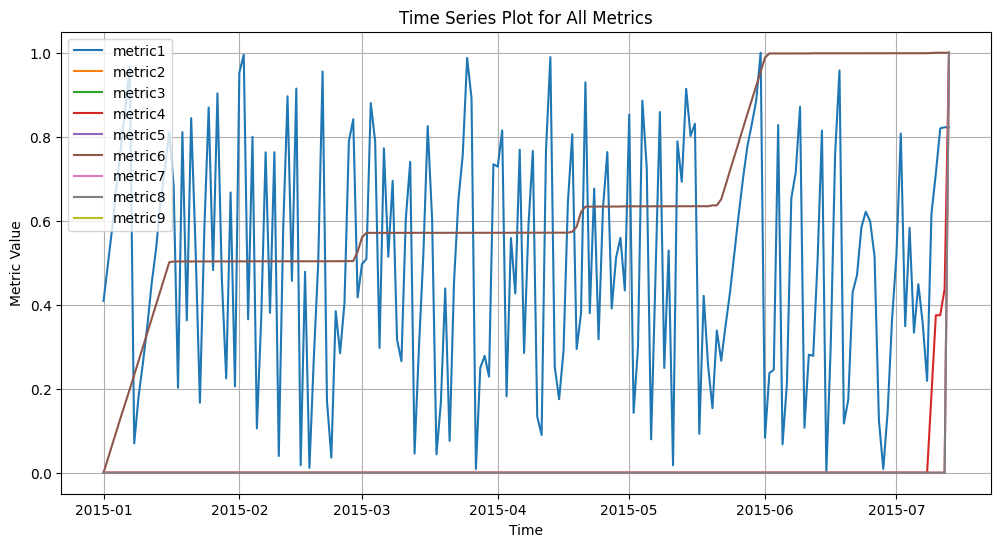

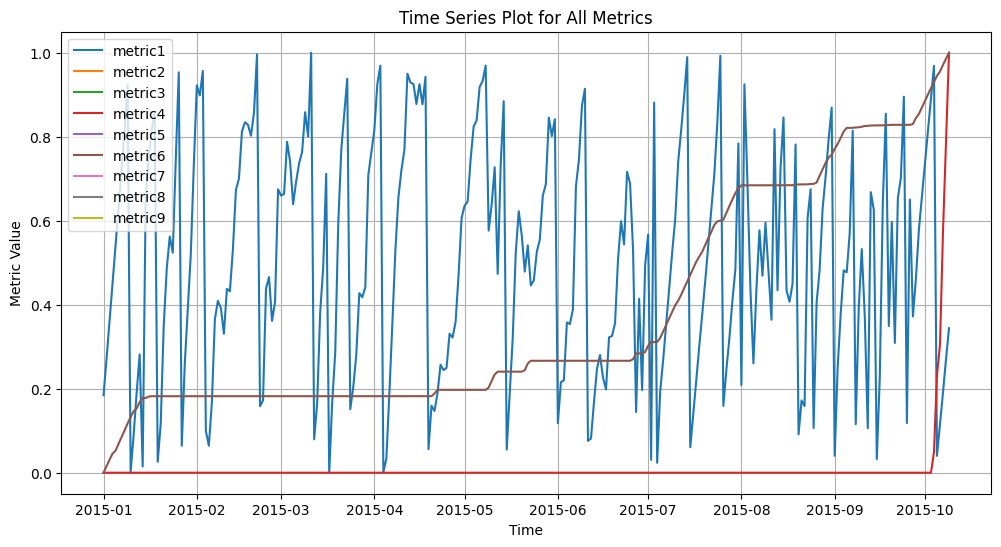

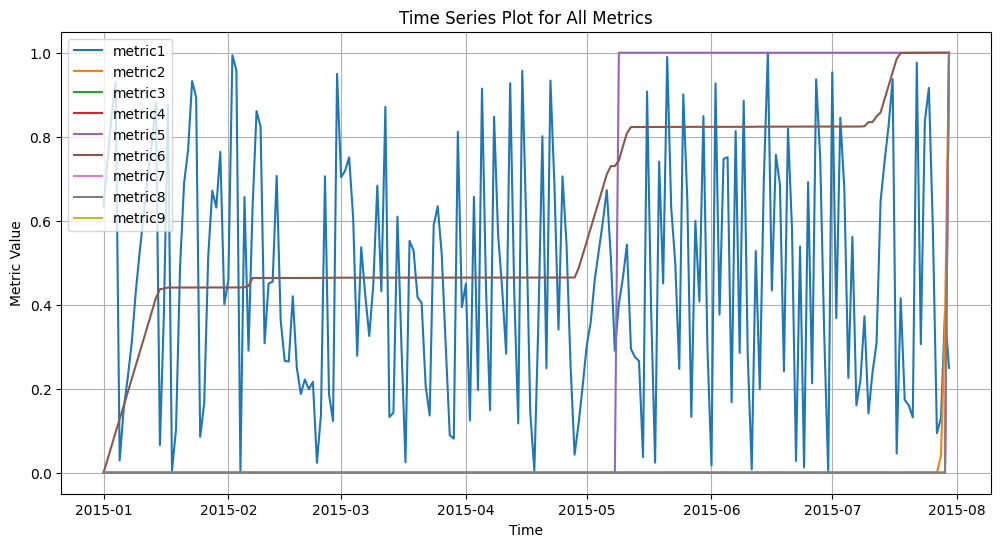

In [14]:
# plot time-series curve for 5 random devices 
device_names = ['Z1F0P16F', 'S1F0S65X', 'W1F1CJ1K', 'Z1F14BGY', 'S1F135TN']
df_grouped = df.groupby('device')

for device in device_names:
    device_df = df_grouped.get_group(device)
    time_series_plot(device_df)


Analysis
1. metric1 shows no relationship with time and failure.
2. metric2 shoots up suddenly in most the cases when failure is approaching
3. metric3 is 0 most of the time
4. metric4 also shoots up suddenly in most the cases when failure is approaching
5. metric5 is also 0 most of the time
6. metric6 rises steadly throughout so no clear relationship with failure
7. metric7 also shoots up suddenly in most the cases when failure is approaching
8. metric8 is copy of metric7
9. metric9 is also 0 most of the time

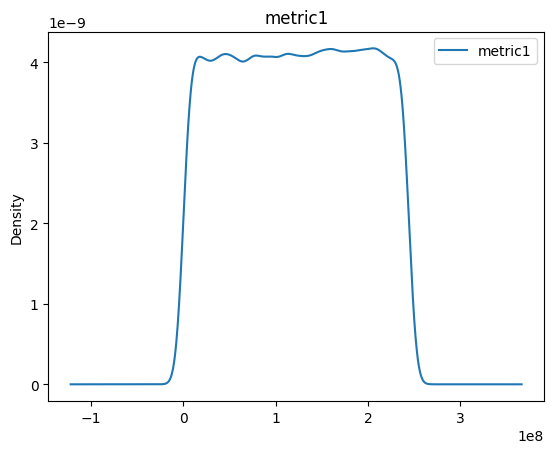

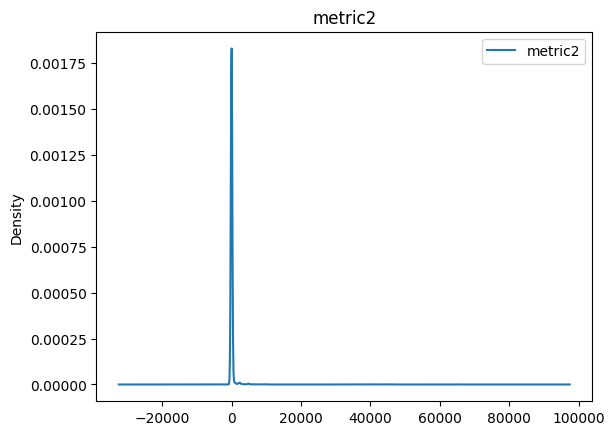

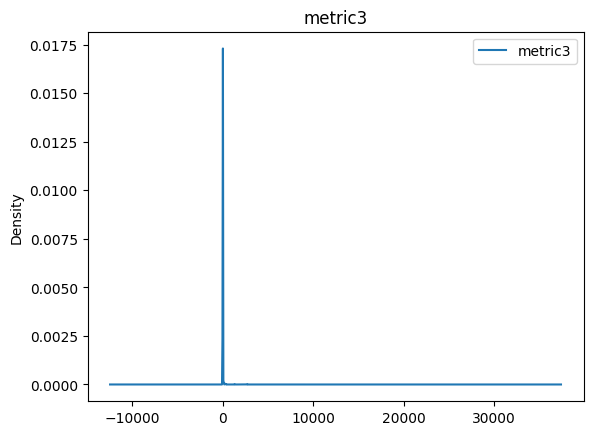

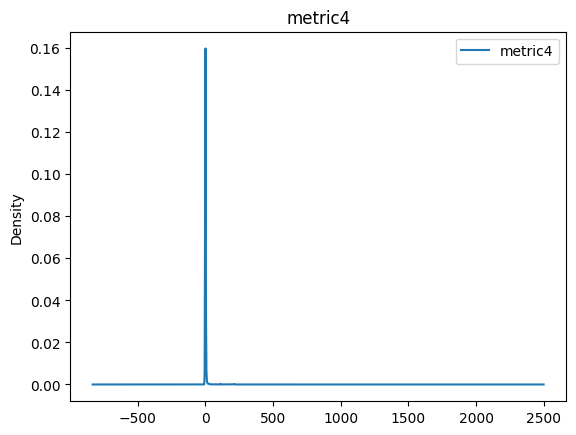

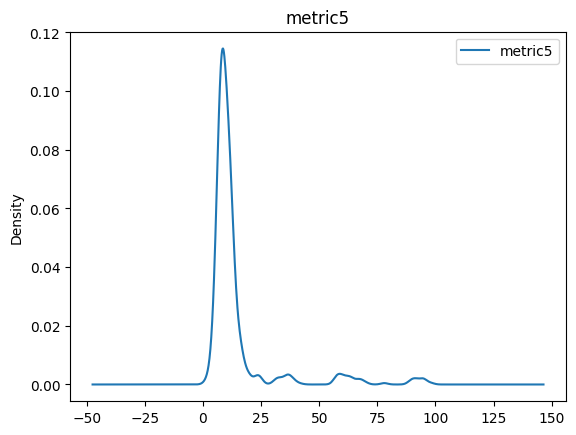

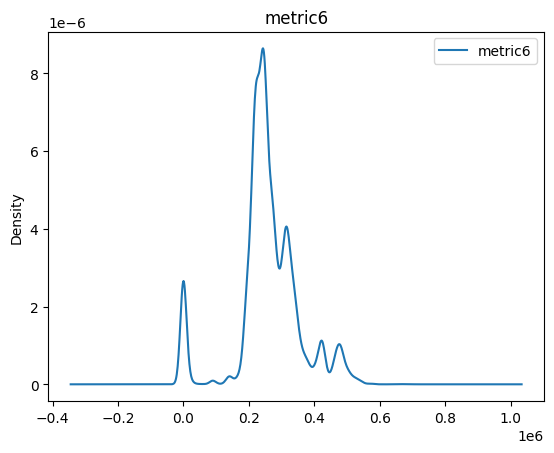

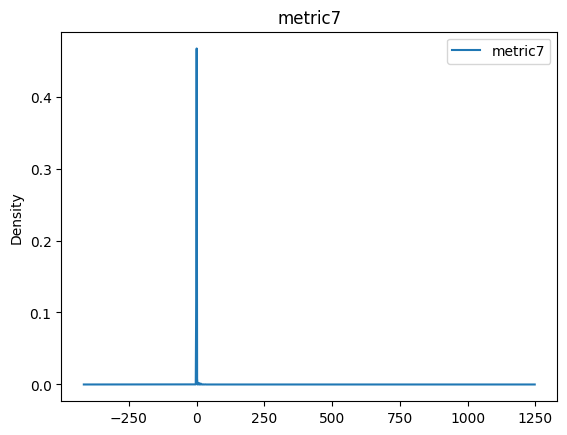

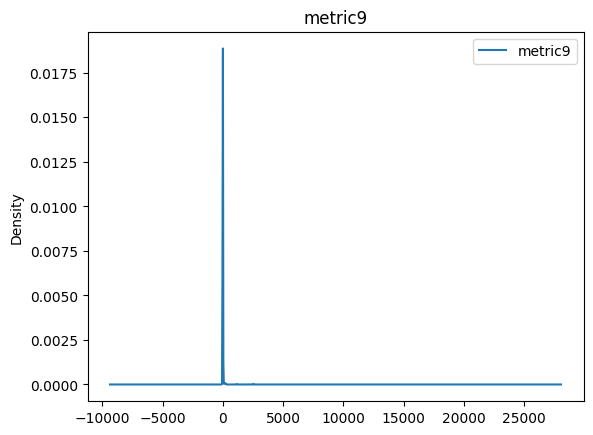

In [15]:
# NOW ANALYSING EACH THE METRICS INDIVIDUALLY
# KDE PLOTS
metrics = ["metric1", "metric2", "metric3", "metric4", "metric5", "metric6", "metric7", "metric9"]
for metric in metrics:
    df[metric].plot(kind='kde')
    plt.legend()
    plt.title(metric)
    plt.show()

ANALYSIS 
1. metric2, metric3, metric4, metric7, metric9 are highly skewed
2. Others are okay

In [16]:
# apply boxcox tranformation 
df['metric2_t'], param1 = stats.boxcox(df['metric2'] + 1)
df['metric3_t'], param2 = stats.boxcox(df['metric3'] + 1)
df['metric4_t'], param3 = stats.boxcox(df['metric4'] + 1)
df['metric7_t'], param4 = stats.boxcox(df['metric7'] + 1)
df['metric9_t'], param5 = stats.boxcox(df['metric9'] + 1)

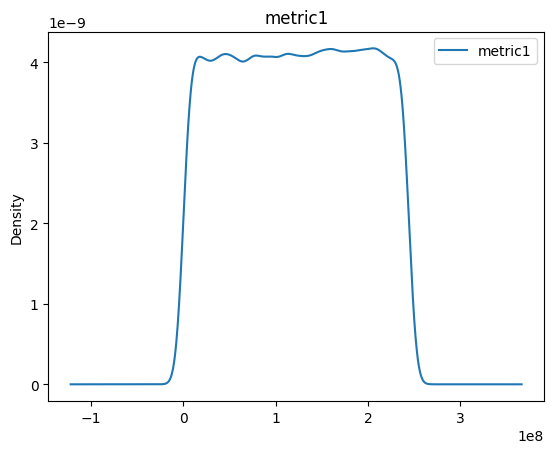

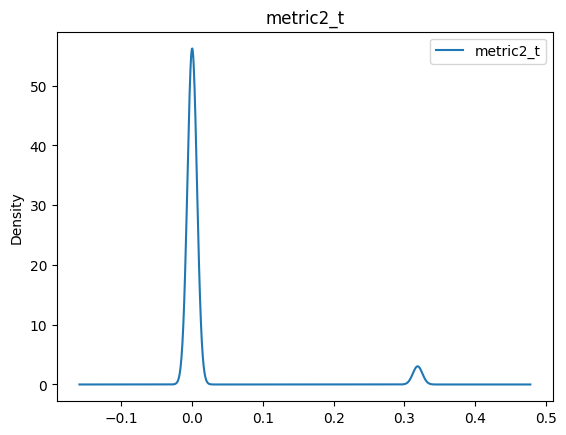

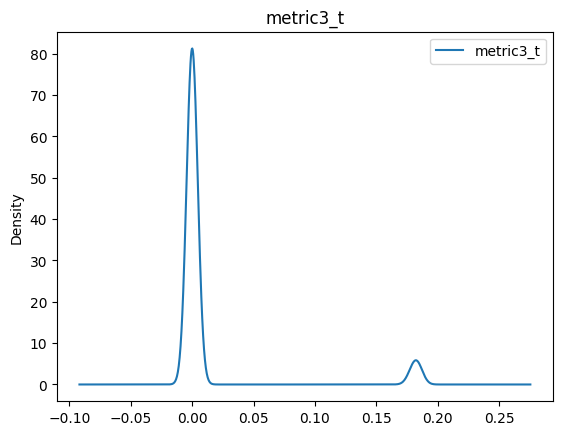

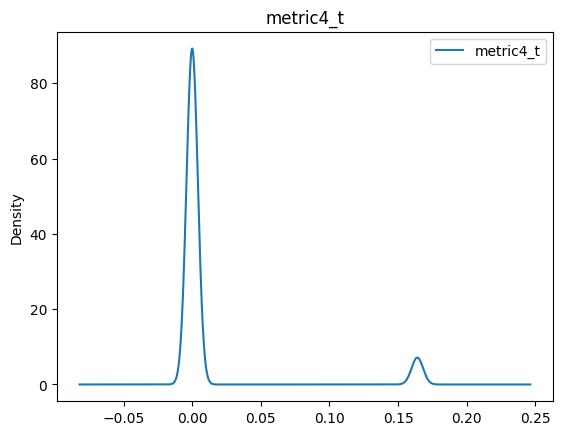

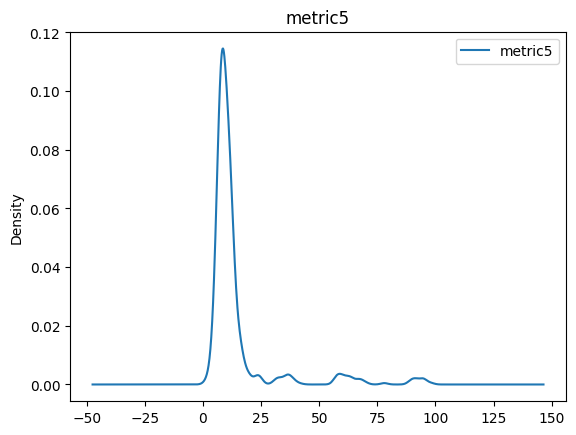

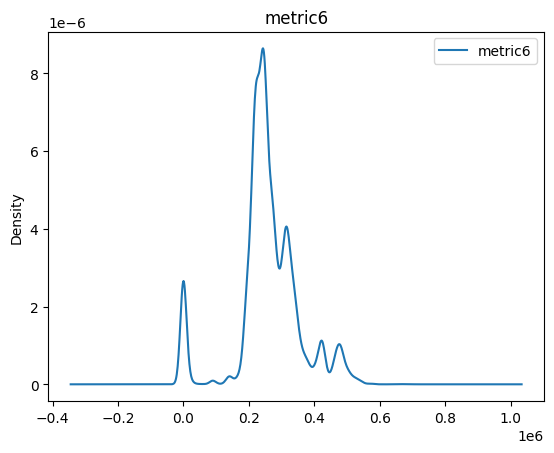

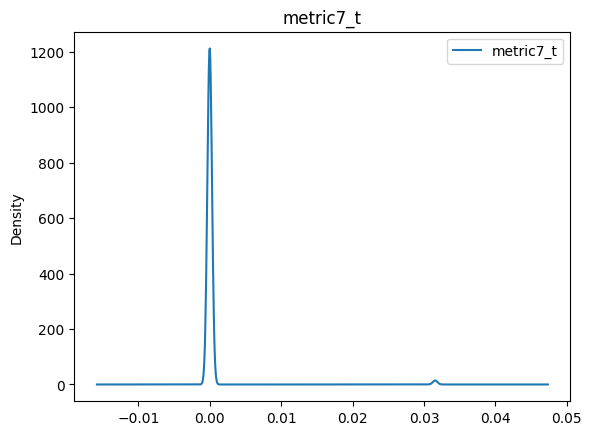

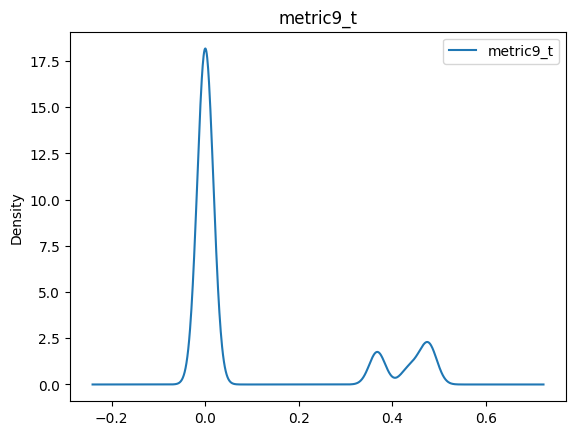

In [17]:
metrics = ["metric1", "metric2_t","metric3_t" , "metric4_t" ,"metric5", "metric6", "metric7_t" , "metric9_t"]
for metric in metrics:
    df[metric].plot(kind='kde')
    plt.legend()
    plt.title(metric)
    plt.show()

In [18]:
# Redefining the failed and non failed dataframes
failed_df = df[df['failure']==1]
non_failed_df = df[df['failure']==0] 

In [19]:
# Reducing the dataset for class imbalance problem 
non_failed_df_unique = non_failed_df.drop_duplicates(subset='device')
failed_df_unique = failed_df.drop_duplicates(subset='device')

new_df = pd.concat([failed_df_unique, non_failed_df_unique], ignore_index=True)
print(f'Failing + Non Failing first entry : {non_failed_df_unique.shape[0]}')
print(f'Failing last entry : {failed_df_unique.shape[0]}')
new_df.shape

Failing + Non Failing first entry : 1169
Failing last entry : 106


(1275, 21)

2. FEATURE SELECTION

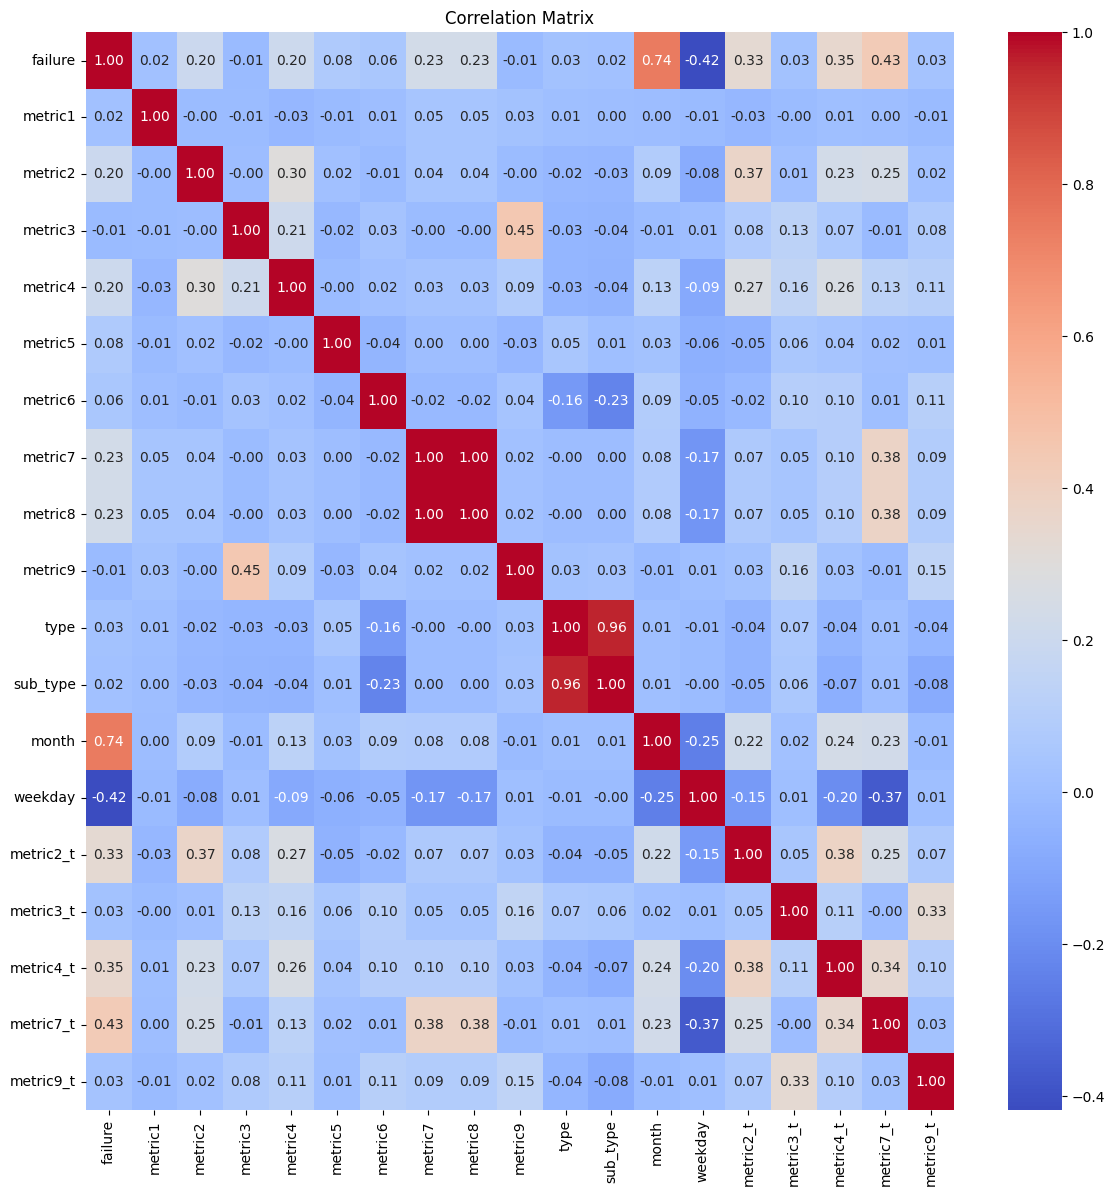

In [20]:
# FEATURE SELECTION
correlation_matrix = new_df.corr(numeric_only='silence')
plt.figure(figsize=(14, 14))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Customize colors and formatting
plt.title("Correlation Matrix")
plt.show()

Now we shall drop non relavent features with respect to failure
1. drop metric2, metric3, metric4, metric7, metric9 because they were skewed
2. drop metric8 because it is duplicated of metric7
3. drop metric1, metric5, metric6, metric3_t, metric9_t because they have very less correlation with failure
4. drop month because it can be misleading
5. drop categorical variables date, device
6. drop either of type or subtype because they both are highly correlated

In [21]:
df.tail()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,...,metric9,type,sub_type,month,weekday,metric2_t,metric3_t,metric4_t,metric7_t,metric9_t
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,...,0,2,4,11,0,0.000000,0.000000,0.000000,0.03156,0.00000
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,...,13,2,4,11,0,0.318799,0.183723,0.164205,0.00000,0.47975
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,...,0,2,4,11,0,0.318800,0.000000,0.000000,0.00000,0.00000
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,...,0,2,4,11,0,0.000000,0.000000,0.000000,0.00000,0.00000
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,...,0,2,4,11,0,0.000000,0.000000,0.000000,0.00000,0.00000


In [22]:
final_df = new_df.drop(['metric2', 'metric3', 'metric4', 'metric7', 'metric9', 'metric8', 'metric1', 'metric5', 'metric6', 'metric3_t', 'metric9_t', 'month', 'date', 'device', 'sub_type'], axis=1)

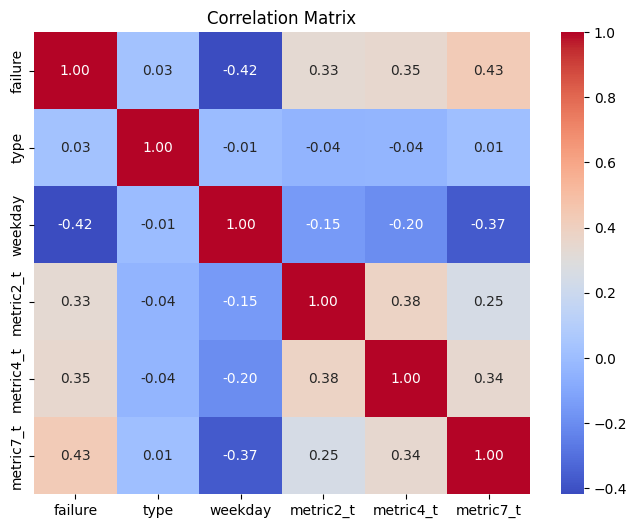

In [23]:
correlation_matrix = final_df.corr(numeric_only='silence')
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Customize colors and formatting
plt.title("Correlation Matrix")
plt.show()

In [68]:
# Data PreProcessing
def pre_process(final_df: pd.DataFrame):
    df = final_df.copy()
    # dependent and independent variable split 
    X = df.drop('failure', axis = 1)
    y = df['failure']

    #test train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
    
    X_train.reset_index(inplace = True, drop = True)
    y_train.reset_index(inplace = True, drop = True)
    X_test.reset_index(inplace = True, drop = True)
    y_test.reset_index(inplace = True, drop = True)

    #sampling
    over_sampling = SMOTE(sampling_strategy=0.3)
    under_sampling = RandomUnderSampler(sampling_strategy=0.4)
    steps = [('over', over_sampling), ('under', under_sampling)]
    pipeline = Pipeline(steps=steps)
    X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

    #scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    dump(scaler, 'scaler.joblib')

    return X_train_scaled, X_test_scaled, y_train_resampled, y_test

X_train, X_test, y_train, y_test = pre_process(final_df)
print("After Sampling")
print(y_train.value_counts())

After Sampling
failure
0    702
1    281
Name: count, dtype: int64


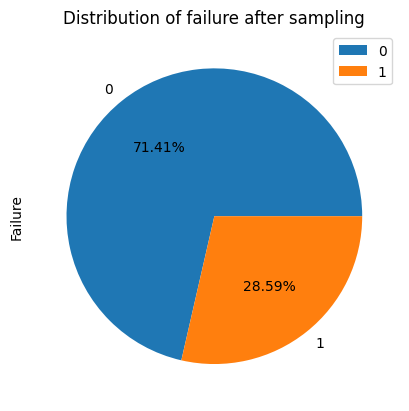

In [69]:
y_train.value_counts().plot.pie(autopct='%1.2f%%')
plt.ylabel('Failure')
plt.title("Distribution of failure after sampling")
plt.legend()
plt.show()

3. MODEL BUILDING

In [70]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_score_scores = []

In [71]:
def DecisionTree(X_train, X_test, y_train, y_test):
    classifier_dt = DecisionTreeClassifier(class_weight='balanced')
    classifier_dt.fit(X_train,y_train)
    
    y_pred = classifier_dt.predict(X_test)
    y_pred_train = classifier_dt.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Accuracy Train:", accuracy_train)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_score_scores.append(f1)

    return classifier_dt

In [72]:
def RandomForest(X_train, X_test, y_train, y_test):
    classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'log_loss', random_state = 30)
    classifier_rf.fit(X_train, y_train)
    
    y_pred = classifier_rf.predict(X_test)
    y_pred_train = classifier_rf.predict(X_train)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Accuracy Train:", accuracy_train)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_score_scores.append(f1)
    
    return classifier_rf

In [73]:
def LogisticReg(X_train, X_test, y_train, y_test):
    classifier_lg = LogisticRegression(random_state=0, max_iter=2000)
    classifier_lg.fit(X_train, y_train)

    y_pred = classifier_lg.predict(X_test)
    y_pred_train = classifier_lg.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Accuracy Train:", accuracy_train)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_score_scores.append(f1)

    return classifier_lg

In [74]:
def KNN(X_train, X_test, y_train, y_test):
    classifier_knn = KNeighborsClassifier()
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)
    y_pred_train = classifier_knn.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Accuracy Train:", accuracy_train)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_score_scores.append(f1)

    return classifier_knn

In [75]:
def NaiveBayes(X_train, X_test, y_train, y_test):
    classifier_nb = GaussianNB()
    classifier_nb.fit(X_train, y_train)
    
    y_pred = classifier_nb.predict(X_test)
    y_pred_train = classifier_nb.predict(X_train)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Accuracy Train:", accuracy_train)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_score_scores.append(f1)
    
    return classifier_nb

In [76]:
def AdaBoost(X_train, X_test, y_train, y_test):
    base_estimator = DecisionTreeClassifier(max_depth=1)
    classifier_ab = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)
    classifier_ab.fit(X_train, y_train)
    
    y_pred = classifier_ab.predict(X_test)
    y_pred_train = classifier_ab.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Accuracy Train:", accuracy_train)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_score_scores.append(f1)

    return classifier_ab

In [77]:
def SupportVC(X_train, X_test, y_train, y_test):
    classifier_svc = SVC(kernel='linear', random_state=0)

    classifier_svc.fit(X_train, y_train)
    y_pred = classifier_svc.predict(X_test)
    y_pred_train = classifier_svc.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Accuracy Train:", accuracy_train)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_score_scores.append(f1)

    return classifier_svc

4. MODEL EVALUATION

In [78]:
logistic = LogisticReg(X_train, X_test, y_train, y_test)

Accuracy Train: 0.8504577822990844
Accuracy: 0.9137254901960784
Precision: 0.5185185185185185
Recall: 0.6086956521739131
F1 Score: 0.5599999999999999


In [79]:
svc = SupportVC(X_train, X_test, y_train, y_test)

Accuracy Train: 0.8463886063072228
Accuracy: 0.8901960784313725
Precision: 0.42857142857142855
Recall: 0.6521739130434783
F1 Score: 0.5172413793103448


In [80]:
nb = NaiveBayes(X_train, X_test, y_train, y_test)

Accuracy Train: 0.9043743641912513
Accuracy: 0.9450980392156862
Precision: 0.6285714285714286
Recall: 0.9565217391304348
F1 Score: 0.7586206896551724


In [81]:
knn = KNN(X_train, X_test, y_train, y_test)

Accuracy Train: 0.9491353001017294
Accuracy: 0.9686274509803922
Precision: 0.7777777777777778
Recall: 0.9130434782608695
F1 Score: 0.84


In [82]:
DecisionTreeModel = DecisionTree(X_train, X_test, y_train, y_test)

Accuracy Train: 0.9715157680569685
Accuracy: 0.9725490196078431
Precision: 0.8076923076923077
Recall: 0.9130434782608695
F1 Score: 0.8571428571428572


In [83]:
random_forest = RandomForest(X_train, X_test, y_train, y_test)

Accuracy Train: 0.9766022380467956
Accuracy: 0.9764705882352941
Precision: 0.84
Recall: 0.9130434782608695
F1 Score: 0.8749999999999999


In [84]:
ada_b = AdaBoost(X_train, X_test, y_train, y_test)

Accuracy Train: 0.960325534079349
Accuracy: 0.9764705882352941
Precision: 0.8695652173913043
Recall: 0.8695652173913043
F1 Score: 0.8695652173913043


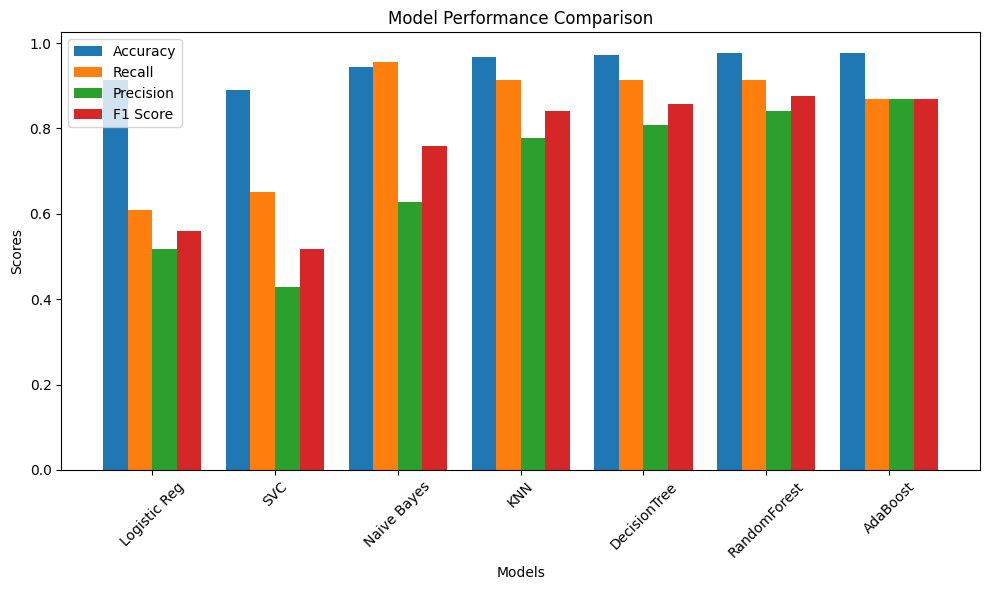

In [85]:
models = ["Logistic Reg", "SVC", "Naive Bayes", "KNN", "DecisionTree", "RandomForest", "AdaBoost"]
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
plt.bar(x - 0.5*width, recall_scores, width, label='Recall')
plt.bar(x + 0.5*width, precision_scores, width, label='Precision')
plt.bar(x + 1.5*width, f1_score_scores, width, label='F1 Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

5. HYPERPARAMETER TUNING

In [86]:
def random_forest_tuned(X_train, X_test, y_train, y_test): 
    rf_classifier = RandomForestClassifier(random_state=42)

    # Define hyperparameters to tune
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['log_loss', 'gini', 'entropy']
    }

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Train the model with the best hyperparameters
    best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
    best_rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_rf_classifier.predict(X_test)
    y_pred_train = best_rf_classifier.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Accuracy Train:", accuracy_train)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)
    dump(best_rf_classifier, 'classifier.joblib')

    return best_rf_classifier

6. FINAL MODEL EVALUATION

In [87]:
best_random_classifier = random_forest_tuned(X_train, X_test, y_train, y_test)

Accuracy Train: 0.9755849440488301
Accuracy: 0.9764705882352941
Precision: 0.84
Recall: 0.9130434782608695
F1 Score: 0.8749999999999999


In [88]:
# plotting the confusion matrix for the model 
y_pred = best_random_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       232
           1       0.84      0.91      0.87        23

    accuracy                           0.98       255
   macro avg       0.92      0.95      0.93       255
weighted avg       0.98      0.98      0.98       255



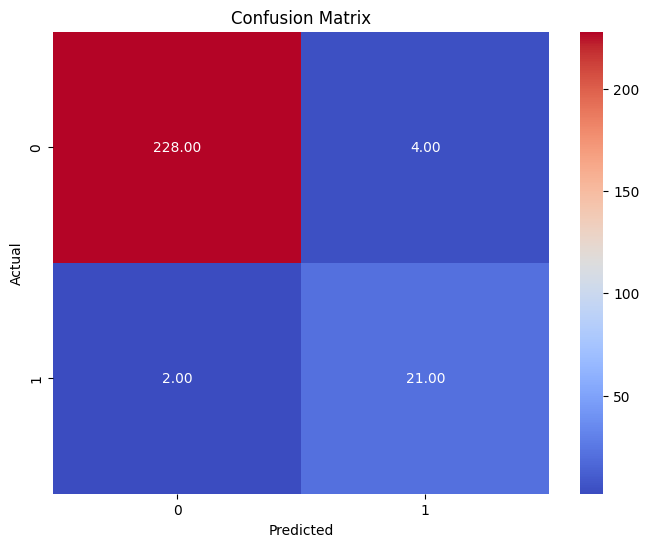

In [89]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt=".2f")  # Customize colors and formatting
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()